In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("Corona_NLP_test.csv", encoding= "latin-1")

In [5]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [6]:
print("Number of rows in data()", format(data.shape[0]))

Number of rows in data() 3798


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [8]:
data["Location"].value_counts(ascending= False)

Location
United States               75
London, England             48
Washington, DC              38
New York, NY                34
Los Angeles, CA             33
                            ..
India, Belgium.              1
Boston, MontrÃ©al, Paris     1
Annapolis, MD                1
here and there               1
Haverford, PA                1
Name: count, Length: 1717, dtype: int64

In [9]:
data["Sentiment"].value_counts(ascending= False)

Sentiment
Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: count, dtype: int64

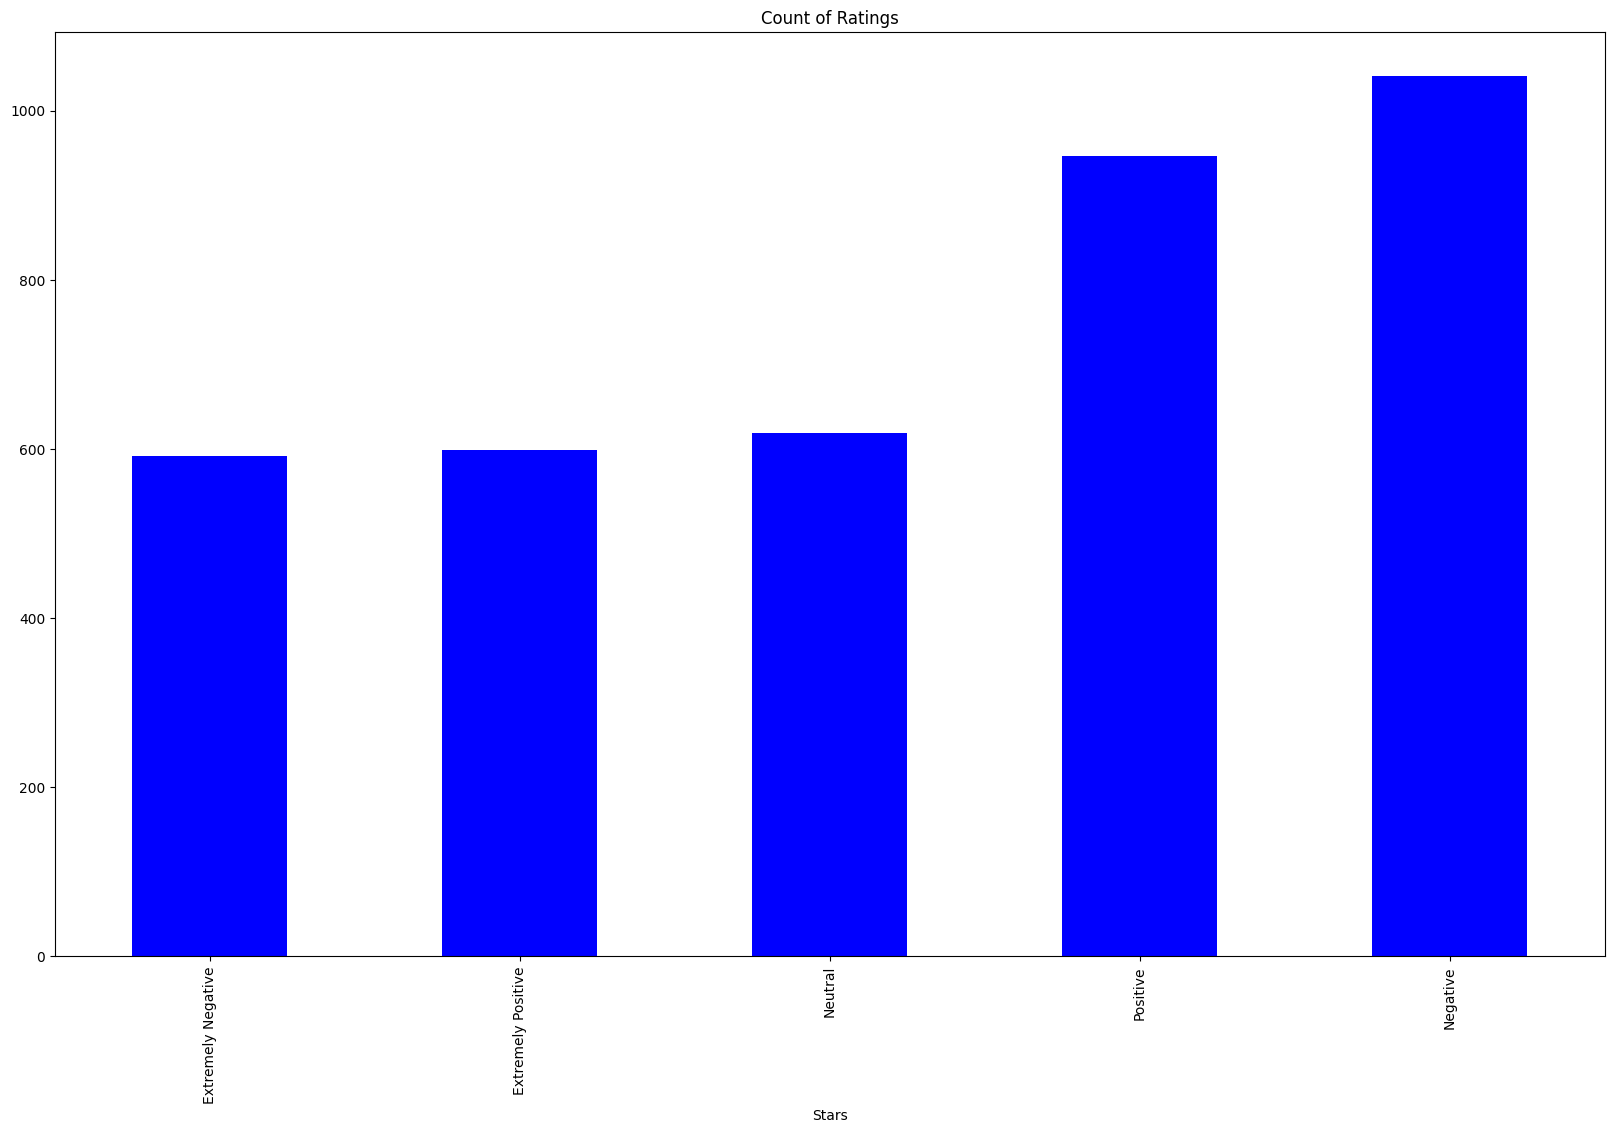

In [10]:
import matplotlib.pyplot as plt
data["Sentiment"].value_counts(ascending= True).plot(kind="bar", title= "Count of Ratings", figsize=(20,12),color="Blue", xlabel="Stars")
plt.show()

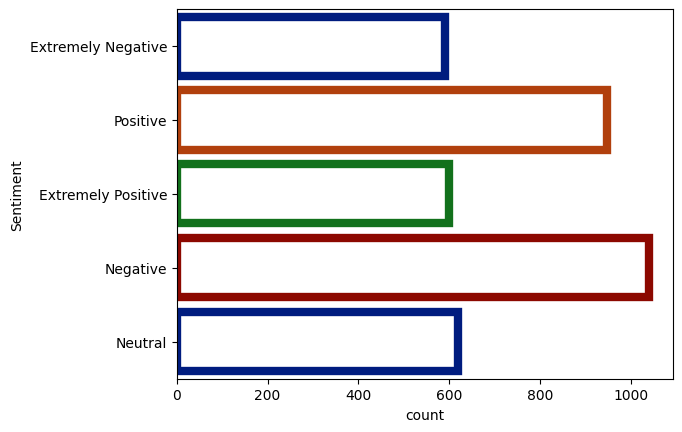

In [11]:
import seaborn as sns
sns.countplot(y="Sentiment",data=data, facecolor=(1,1,1,1),linewidth=6, edgecolor=sns.color_palette("dark",4))
plt.show()

In [12]:
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [13]:
data.drop(data.columns[[0,1,2,3]],axis=1,inplace= True)

In [14]:
data.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [15]:
data.duplicated().sum()

0

In [16]:
blanks=[]
for index in data["OriginalTweet"]:
    if index.isspace()== True:
        blanks.append(index)

In [17]:
print(blanks)

[]


In [18]:
x=data["OriginalTweet"]
y=data["Sentiment"]

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.33)# type: ignore

In [20]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
textclf= Pipeline((("tfidf", TfidfVectorizer()),("clf",LinearSVC())))

In [22]:
textclf.fit(x_train,y_train)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
preds=textclf.predict(x_test)

In [24]:
print(accuracy_score(y_test,preds))

0.43381180223285487


In [25]:
cm= confusion_matrix(y_test,preds)
print(cm)

[[ 89   3  69   5  17]
 [  3  84  28   7  69]
 [ 53  17 161  41  91]
 [  8  11  69  92  35]
 [ 19  59  66  40 118]]


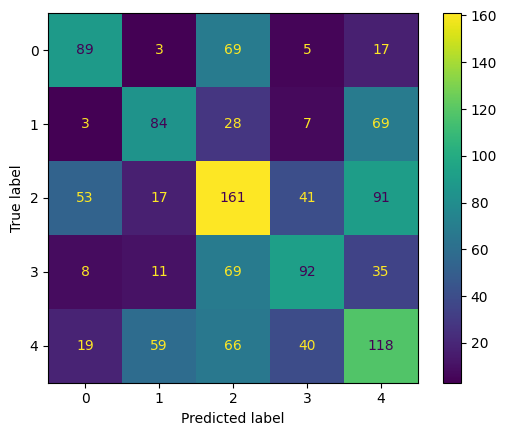

In [26]:
cm_display= ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

In [27]:
newtweet=[("I am really happy in the covid process. I hope we will work remotely after this pandemic.")]

In [28]:
textclf.predict(newtweet)

array(['Positive'], dtype=object)

In [30]:
import pickle
pickle.dump(textclf, open("Text_classification.pkl",'wb'))